In [1]:
import pandas as pd

df = pd.read_csv('c:/data/game/appstore.csv')

In [2]:
# 'Name', 게임명 'User Rating Count', 총별점(0.0~5.0) 'Price', 가격
# 'In-app Purchases', 인앱결제 'Description', 게임설명 'Age Rating', 사용연령(4,9,12,17)
# 'Languages', 언어, 'Original Release Date', 출시일, 'Current Version Release Date' 최신버전
# 'Size' 게임 용량



df = df.drop(['Name', 'Average User Rating(1)','Description','URL', 'ID','Subtitle', 'Icon URL',
'Developer', 'Primary Genre', 'Genres'], axis=1)


In [3]:
df['Age Rating'].value_counts()

4+     11769
9+      2470
12+     2046
17+      662
Name: Age Rating, dtype: int64

In [4]:
#원핫 인코딩(연령대)
df = pd.get_dummies(df, columns=['Age Rating'], prefix='Age Rating')

In [5]:
#NUll값을 0으로 대체
df = df.fillna(0)

In [6]:
#제공언어를 개수로 변환 후, 원래 테이블값과 치환
lan_list = []

lang=df['Languages']

#제공 언어를 개수로 변환
for a in lang.values:
    b = a.split(', ')
    lan_list.append(len(b))
    
#lan_list    
#기존 df의 값을 치환
df['Languages'] = lan_list

In [7]:
#인앱결제의 총 가격(가격이 클수록, 컨텐츠가 다양함)
total = []
In_app=df['In-app Purchases']
contents = In_app.values.tolist()

#인앱결제 상품 개수를 더함
for i in contents:
    if i != 0:
        total.append(len(str(i).split()))
    else:
        total.append(i)

In [8]:
df['In-app Purchases'] = total

In [9]:
from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()
print('present:', now.day,'/', now.month,'/', now.year)

#데이터프레임 형식으로 형식을 편집
type(now)


present: 6 / 2 / 2022


datetime.datetime

In [10]:
#게임 출시일이 기록된 리스트
month = []
ORD=df['Original Release Date']
contents = ORD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

month[:5]

[datetime.datetime(2016, 10, 15, 0, 0),
 datetime.datetime(2017, 4, 18, 0, 0),
 datetime.datetime(2018, 12, 18, 0, 0),
 datetime.datetime(2017, 6, 29, 0, 0),
 datetime.datetime(2017, 8, 15, 0, 0)]

In [11]:
from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    #최근 업데이트 개월수는 적을수록 더 많은 업데이트를 했음을 암시
    #따라서 최근 10년 - 마지막 업데이트 날을 계산해 역수로 표현
    result = 120 - (12*delta.years + delta.months) # 10년(120개월) - (연*12 + 잔여개월수) = 최근 업데이트 개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Original Release Date'] = month2
    

In [12]:
from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()
print('present:', now.day,'/', now.month,'/', now.year)

#데이터프레임 형식으로 형식을 편집
type(now)


present: 6 / 2 / 2022


datetime.datetime

In [13]:
#게임 업데이트일이 기록된 리스트
month = []
CVRD=df['Current Version Release Date']
contents = CVRD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)


In [14]:
from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Current Version Release Date'] = month2
    

In [15]:
df.head()

,Average User Rating,Result,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
0,2.0,0,0.0,0.0,0,2,26074112.0,57,47,0,0,1,0
1,4.0,1,42.0,0.0,4,2,90423296.0,63,55,1,0,0,0
2,4.5,1,9146.0,0.0,9,8,198654976.0,83,30,0,0,1,0
3,4.5,1,595.0,0.0,7,11,60456960.0,65,54,0,0,0,1
4,4.5,1,1930.0,0.0,2,13,48525312.0,67,30,0,0,1,0


In [16]:
#게임 평균 별점 예측
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
#유저가 부여한 평균 별점을 기준으로 한 평균값들
df.groupby('Result').mean()

,Average User Rating,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
Result,,,,,,,,,,,,
0,2.176514,273.138104,0.922147,1.128973,2.899385,9.283675e+07,52.254873,58.309306,0.087621,0.040825,0.750922,0.120632
1,4.434047,3936.495771,0.587213,3.911643,3.999460,1.626295e+08,43.597985,53.923340,0.188591,0.035451,0.578730,0.197229


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    11390
1     5557
Name: Result, dtype: int64

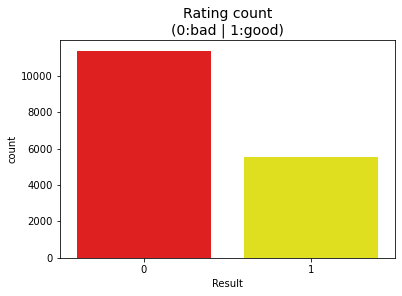

In [18]:
#별점 분포 확인
import seaborn as sns

colors = ['red', 'yellow']
sns.countplot('Result', data=df, palette=colors)
plt.title('Rating count\n(0:bad | 1:good)', fontsize=14)

df['Result'].value_counts()

In [19]:
df.columns

Index(['Average User Rating', 'Result', 'User Rating Count', 'Price',
       'In-app Purchases', 'Languages', 'Size', 'Original Release Date',
       'Current Version Release Date', 'Age Rating_12+', 'Age Rating_17+',
       'Age Rating_4+', 'Age Rating_9+'],
      dtype='object')

In [20]:
train_cols = df.columns[2:]
X = df[train_cols]
y = df['Result']

In [21]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp, y_samp], axis=1)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating count\n(0:bad | 1:good)')

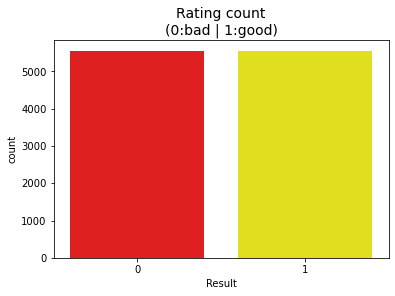

In [22]:
#별점 분포 확인
import seaborn as sns

colors = ['red', 'yellow']
sns.countplot('Result', data=df2, palette=colors)
plt.title('Rating count\n(0:bad | 1:good)', fontsize=14)

In [23]:
df2['Result'].value_counts()

0    5557
1    5557
Name: Result, dtype: int64

In [24]:
train_cols = df.columns[2:]
X = df2[train_cols]
y = df2['Result']

,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
0,0.0,2.99,0,23,92003328.0,55,65,1,0,0,0
1,33.0,0.00,0,1,45700803.0,-6,114,0,0,0,1
2,0.0,0.99,0,1,1612800.0,-28,59,0,0,1,0
3,0.0,0.00,5,1,248676352.0,21,94,0,0,0,1
4,15.0,0.00,0,1,25793536.0,72,48,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11109,143719.0,0.00,6,66,109671424.0,-27,30,0,0,1,0
11110,1867.0,0.00,9,43,90133504.0,48,42,0,0,0,1
11111,710.0,0.00,10,111,523978752.0,75,30,1,0,0,0
11112,52.0,2.99,1,32,23547904.0,13,36,0,0,1,0


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#logit
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)), #logit >>> 변수들의 유의미함을 설명하는 회귀계수 출력
])

params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.663750997086225


In [26]:
#알고리즘별 정확도를 저장할 리스트
scores=[]

In [27]:
scores.append(grid.best_score_)
scores

[0.663750997086225]

In [28]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier, export_graphviz
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)) #가지치기의 max_depth=3
}

#트리 모델 생성
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.8152867527682806


In [29]:
scores.append(grid.best_score_)
scores

[0.663750997086225, 0.8152867527682806]

In [30]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10)), #생성할 나무의 개수
}

#결과
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 70}
0.9015661662046793


In [31]:
scores.append(grid.best_score_)
scores

[0.663750997086225, 0.8152867527682806, 0.9015661662046793]

In [32]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

params = {
    'clf__n_neighbors': list(range(1,11)), #최근접 이웃의 수
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 10}
0.5713474339056924


In [33]:
scores.append(grid.best_score_)
scores

[0.663750997086225, 0.8152867527682806, 0.9015661662046793, 0.5713474339056924]

In [34]:
#인공신경망
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=1000)),
])

params = {
    'clf__hidden_layer_sizes': [(50,),(100,)], #은닉층 수 [(50,),(100,),(50,50),(100,100)]
    #'clf__activation': ['tanh', 'relu'], #활성화 함수
    #'clf__alpha': [0.001, 0.01, 0.1] #실제값과 예측값 사이의 오차에 대한 패널티(과할 경우 과적합, 적을 경우 과소적합)
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__hidden_layer_sizes': (100,)}
0.5325702526793807


In [35]:
scores.append(grid.best_score_)
scores

[0.663750997086225,
 0.8152867527682806,
 0.9015661662046793,
 0.5713474339056924,
 0.5325702526793807]

In [36]:
#SVM
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])

params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100, 'clf__gamma': 0.0001}
0.6696890888405042


In [37]:
scores.append(grid.best_score_)
scores

[0.663750997086225,
 0.8152867527682806,
 0.9015661662046793,
 0.5713474339056924,
 0.5325702526793807,
 0.6696890888405042]

['LOGIT', 'TREE', 'RF', 'KNN', 'ANN', 'SVM']
[0.663751   0.81528675 0.90156617 0.57134743 0.53257025 0.66968909]
best algorithm: RF
best accuracy: 0.9015661662046793


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

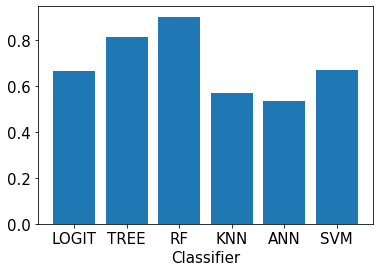

In [38]:
#알고리즘별 예측도 그래프
import numpy as np
methods = ['LOGIT', 'TREE', 'RF', 'KNN', 'ANN', 'SVM']

scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)

print(methods) # 사용된 알고리즘
print(scores_arr) # 가장 높은 정확도
print('best algorithm:', methods[idx])
print('best accuracy:', max_rate )

plt.rcParams['font.size']=15
plt.bar(methods, scores_arr)
plt.xlabel('Classifier')
plt.ylabel

#결론: 렌덤포레스트의 정확도가 가장 높다

In [39]:
#최적의 분류 알고리즘(의사결정나무, 랜덤 포레스트)를 이용해 값 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#트리모델
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))
#과적합

train: 1.0
test: 0.8668466036887089


In [41]:
#max_depth 가지치기
model = DecisionTreeClassifier(max_depth=5, random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [42]:
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))

train: 0.9225059048475986
test: 0.9064327485380117


In [43]:
#오분류표
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 944,  198],
       [  10, 1071]], dtype=int64)

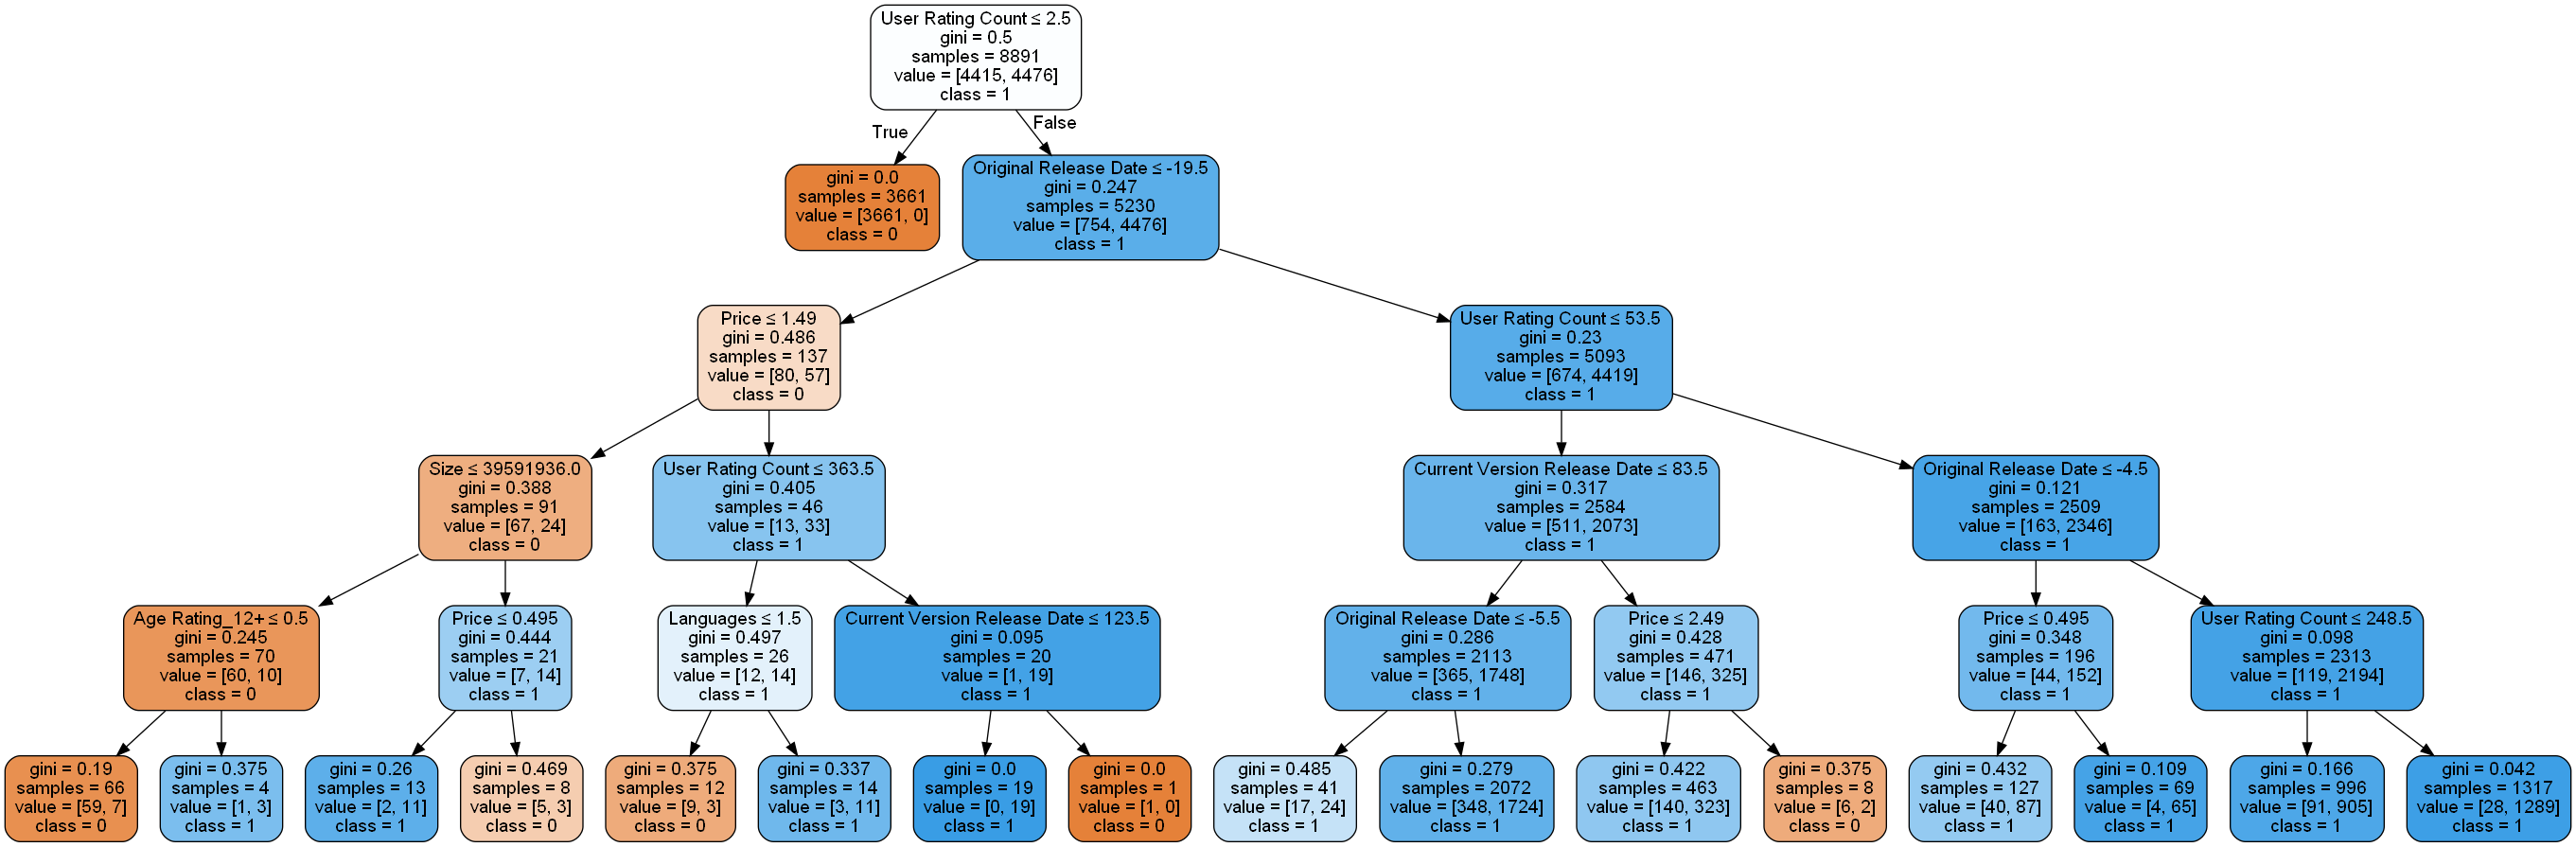

In [44]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=train_cols,
class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

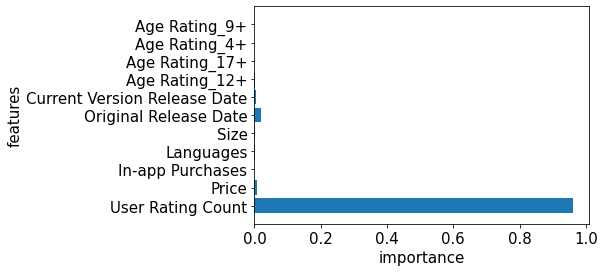

In [45]:
#특성중요도
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel('importance')
    plt.ylabel('features')
    plt.ylim(-1, n_features)

plot_tree(model)

#유저가 부여한 총별점 > 게임출시일 > 가격 & 업데이트날짜

In [46]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
#100개의 트리
forest = RandomForestClassifier(n_estimators=100,
random_state=10, max_depth=5)
forest.fit(X_train, y_train)

print('train:', forest.score(X_train, y_train))
print('test:', forest.score(X_test, y_test))

train: 0.920368912383309
test: 0.9064327485380117


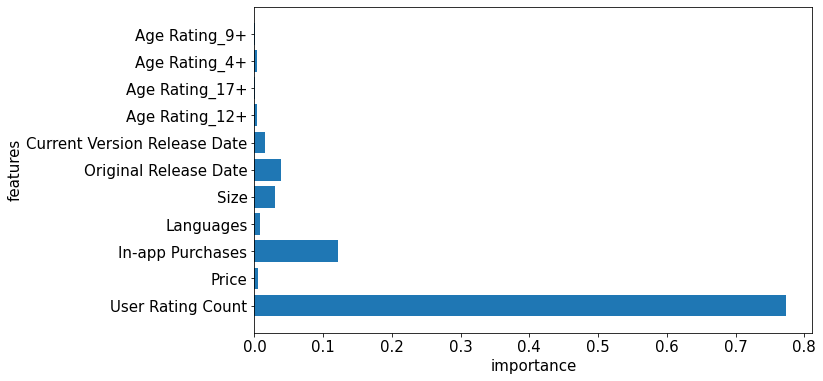

In [47]:
#랜덤 포레스트 에서 특성의 중요도
plt.figure(figsize=(10,6))
plot_tree(forest)

In [48]:
#오분류표
from sklearn.metrics import confusion_matrix
pred = forest.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 937,  205],
       [   3, 1078]], dtype=int64)

In [49]:
df_cm = pd.DataFrame(cm, index=[0,1],
columns=[0,1])
df_cm

,0,1
0,937,205
1,3,1078


<AxesSubplot:title={'center':'Confusion Matrix'}>

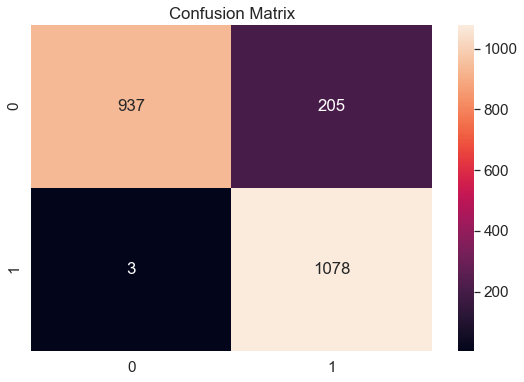

In [50]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='d')

In [51]:
from sklearn.svm import SVC
svc = SVC(random_state=10)
svc.fit(X_train, y_train)

SVC(random_state=10)

In [52]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최소값\n{0}'.format(X_train_scaled.min(axis=0)))
print('특성별 최대값\n{0}'.format(X_train_scaled.max(axis=0)))
X_test_scaled = (X_test - min_on_training) / range_on_training

특성별 최소값
User Rating Count               0.0
Price                           0.0
In-app Purchases                0.0
Languages                       0.0
Size                            0.0
Original Release Date           0.0
Current Version Release Date    0.0
Age Rating_12+                  0.0
Age Rating_17+                  0.0
Age Rating_4+                   0.0
Age Rating_9+                   0.0
dtype: float64
특성별 최대값
User Rating Count               1.0
Price                           1.0
In-app Purchases                1.0
Languages                       1.0
Size                            1.0
Original Release Date           1.0
Current Version Release Date    1.0
Age Rating_12+                  1.0
Age Rating_17+                  1.0
Age Rating_4+                   1.0
Age Rating_9+                   1.0
dtype: float64


In [53]:
svc = SVC(random_state=10)
svc.fit(X_train_scaled, y_train)

SVC(random_state=10)

최적의 C: 1000
최적의 gamma: 0.1
최적의 정확도: 0.7044534412955465


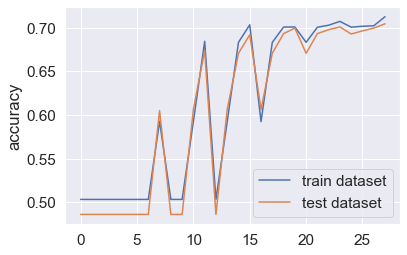

In [54]:
import numpy as np
import matplotlib.pyplot as plt

train_rate = []
test_rate = []

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        svc = SVC(C=n, gamma=g, random_state=10)
        svc.fit(X_train_scaled, y_train)
        train_rate.append([n, g, svc.score(X_train_scaled, y_train)])
        test_rate.append([n, g, svc.score(X_test_scaled, y_test)])

train_arr = np.array(train_rate)
test_arr = np.array(test_rate)
max_rate = np.max(test_arr[:,2])
idx = np.where(test_arr == max_rate)[0][0]
print('최적의 C:', test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최적의 정확도:', test_rate[idx][2])

plt.rcParams['font.size'] = 15
plt.plot(range(len(train_rate)), train_arr[:,2], label='train dataset')
plt.plot(range(len(test_rate)), test_arr[:,2], label='test dataset')
plt.ylabel('accuracy')
plt.legend()

In [55]:
print(train_rate[idx][2])
print(test_rate[idx][2])

0.7125182769092341
0.7044534412955465


In [56]:
print('학습용:', svc.score(X_train, y_train))
print('검증용:', svc.score(X_test, y_test))

학습용: 0.496569564728377
검증용: 0.5137201979307242


In [57]:

#새로운 값 예측 [총별점, 가격, 과금상품개수, 제공언어, 사이즈(바이트) 출시일, 최근업데이트일, 12, 17, 4, 9]
game1 = [[500, 3.99, 4, 2, 30000000, 60, 10, 0, 0, 1, 0]]
game2 = [[1000,1.99,6,3, 25000000, 24,5,1,0,0,0]]
game3 = [[700,0,8,1, 35000000,36,18,0,1,0,0]]

#t스케일링을 해야 할 경우
#game1 = scaler.transform(game1)
#game2 = scaler.transform(game2)
#game3 = scaler.transform(game3)


print(forest.predict(game1))
print(model.predict(game2))
print(svc.predict(game3))

[1]
[1]
[0]
